<a href="https://colab.research.google.com/github/mohiiieldin/STP-Hakathon-Predicting-El-menus-Resturants-reviews-/blob/master/STP_machathon_day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta,date
import pytz
import seaborn as sns

#importing machine learning libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.cluster import KMeans

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
#allowing visualizastions inline
%matplotlib inline

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
#importing datasets
original = pd.read_csv('train.csv')
sample_sub = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')

In [0]:
original.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
0,ae9a2bf4d42c67aed92df769580c0f3f30c9b823,4e8c86cfdb5034d208be316e876e885e0effa536,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,c67a6eda67d18898729657a6c53fb21f01961fea,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b,8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,23ce012715a4cf5bfed7f0821e461f1593f47027,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
df = original.copy()

In [0]:
df.restaurant_features.isnull().sum()

275

In [0]:
df.shape

(64150, 7)

In [0]:
df.shape

(64150, 7)

In [0]:
df.user_uuid.nunique()

34235

In [0]:
test.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Id
0,19e98f91a13b634be56eed320a5cfa428739645a,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,0
1,f0290330fa79c2ee444f111acfafb182f155db13,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Dokki,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,1
2,6aa82c8a1f318d6c1854d9a740f9505ca17fa9b6,3de74737b13a7d38064af610999f8e072d28dc0a,0,Downtown,['Egyptian' 'Koshary'],['No Smoking Area' 'Outdoor' 'Hidden Gems' 'Ch...,2
3,c0d74c01ffc2725e7eaf2eae20b7e4841ddfc1d5,0f80dcedefb437153c78531e139d5305bc513e2d,0,Maadi,['Pizza' 'American'],['No Smoking Area'],3
4,2aedfea343537c087cdfb5c70d6a432b689c1d2a,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,1,Nasr City,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4


In [0]:
sample_sub.head()

,Id,Ratings
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3


In [0]:
different = []
for usr in test.user_uuid.unique() :
  if usr not in df.user_uuid :
    different.append(usr)
len(different)

13163

In [0]:
test.shape

(15879, 7)

In [0]:
df.drop('user_uuid', axis =1 , inplace=True)

In [0]:
df.drop('restaurant_uuid', axis=1, inplace=True)

In [0]:
df.head()

,discounted,area,cuisine,restaurant_features,Ratings
0,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
df.isnull().sum()

discounted               0
area                     0
cuisine                  0
restaurant_features    275
Ratings                  0
dtype: int64

In [0]:
df[df.restaurant_features.isnull()]

,discounted,area,cuisine,restaurant_features,Ratings
27,1,New Cairo,['Burgers' 'Sandwiches' 'Fast Food'],NaN,5.0
104,0,Nasr City,['Oriental' 'Syrian'],NaN,2.0
367,0,New Cairo,['Egyptian' 'Oriental' 'Grill'],NaN,4.0
432,0,Heliopolis,['Egyptian' 'Oriental' 'Grill'],NaN,5.0
485,0,New Cairo,['Sandwiches' 'Syrian'],NaN,4.0
...,...,...,...,...,...
63323,0,Nasr City,['Fast Food'],NaN,2.0
63361,1,New Cairo,['Fast Food'],NaN,1.0
63450,0,Heliopolis,['Egyptian' 'Oriental' 'Grill'],NaN,5.0
63519,0,Nasr City,['Fast Food'],NaN,2.0


In [0]:
df.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
0,ae9a2bf4d42c67aed92df769580c0f3f30c9b823,4e8c86cfdb5034d208be316e876e885e0effa536,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,c67a6eda67d18898729657a6c53fb21f01961fea,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b,8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,23ce012715a4cf5bfed7f0821e461f1593f47027,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
df_reswithnan = df[df.restaurant_features.isnull()]

In [0]:
df_reswithnan.shape

(275, 7)

In [0]:
df_reswithnan.restaurant_uuid.nunique()

104

In [0]:
rid = df_reswithnan.restaurant_uuid.unique()

In [0]:
df_resordered = df[df.restaurant_uuid.isin(rid)].sort_values(by=['restaurant_uuid'])

In [0]:
df_resordered[df_resordered.restaurant_features.notnull()]

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
17916,4ef25f5680c3355018ddbd0cd9b4216bb7e970a3,00e1b9c373017f45d44095bdf59a692e4362990e,0,Nasr City,['Chicken'],['TV'],1.0
52424,fe34fd5996f1e5c252d91a7ec938729d0b90b97f,00e1b9c373017f45d44095bdf59a692e4362990e,1,Nasr City,['Chicken'],['TV'],1.0
56831,2b8a8f161202d7a991d87c878c08b230dc2b1cef,00e1b9c373017f45d44095bdf59a692e4362990e,0,Nasr City,['Chicken'],['TV'],1.0
61729,d7364bb0fb5ade83470a3543ee17b18167282d3a,00e1b9c373017f45d44095bdf59a692e4362990e,1,Al Rehab City,['Chicken'],['TV'],1.0
15324,43e901431c8f35606250d11651302d9742c89656,00e1b9c373017f45d44095bdf59a692e4362990e,1,Nasr City,['Chicken'],['TV'],1.0
...,...,...,...,...,...,...,...
33256,1a51ed55c5c66acfc55696e6402f65c7b4b34e7e,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,0,Maadi,['Syrian'],['No Smoking Area' 'Khorogat Iftar'],2.0
11103,b159d9404fafadee46f2ccb635a5e04cb93097cd,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,0,Maadi,['Syrian'],['No Smoking Area' 'Khorogat Iftar'],2.0
15168,f0ee41c7f5e84ba507fd43cdc337757f586043cd,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,0,Maadi,['Syrian'],['No Smoking Area' 'Khorogat Iftar'],2.0
46541,8712f2aea091dcd827ca07b22e8f10c1db3f5670,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,0,Maadi,['Syrian'],['No Smoking Area' 'Khorogat Iftar'],2.0


In [0]:
df_join1 = df[df.restaurant_features.isnull()]

In [0]:
df_join1 = df_join1[['restaurant_uuid','restaurant_features']]

In [0]:
df_join1.shape

(275, 2)

In [0]:
rid = df_join1.restaurant_uuid.unique()

In [0]:
len(rid)

104

In [0]:
#-------#

In [0]:
df = original.copy()

In [0]:
df.isnull().sum()

user_uuid                0
restaurant_uuid          0
discounted               0
area                     0
cuisine                  0
restaurant_features    275
Ratings                  0
dtype: int64

In [0]:
df = df[df.restaurant_features.notnull()]

In [0]:
df.isnull().sum()

user_uuid              0
restaurant_uuid        0
discounted             0
area                   0
cuisine                0
restaurant_features    0
Ratings                0
dtype: int64

In [0]:
df.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
0,ae9a2bf4d42c67aed92df769580c0f3f30c9b823,4e8c86cfdb5034d208be316e876e885e0effa536,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,c67a6eda67d18898729657a6c53fb21f01961fea,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b,8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,23ce012715a4cf5bfed7f0821e461f1593f47027,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


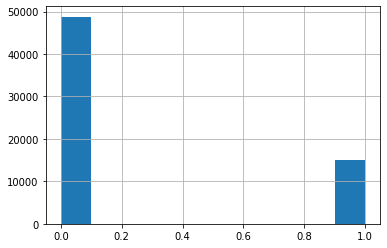

In [0]:
df.discounted.hist()

In [0]:
df.corr()

,discounted,Ratings
discounted,1.000000,0.078623
Ratings,0.078623,1.000000


In [0]:
df.area.nunique()

44

In [0]:
df.area.value_counts()

Maadi                        10898
New Cairo                    10177
Heliopolis                    9612
Nasr City                     8842
Mohandessin                   5928
6th of October                3563
Al Rehab City                 3425
Zamalek                       3079
Sheikh Zayed                  1728
Dokki                         1563
Masaken Sheraton              1098
Downtown                       852
Haram                          438
Al Mokatam                     329
Manial                         325
Hadayek El Kobba               288
Madinaty                       233
Faisal                         227
Abbassiya                      217
Smart Village                  188
Semouha                        152
Agouza                         115
Hadayek El Ahram                70
Ain Shams                       65
Al Shatby                       61
Al Raml Station                 53
Louran                          51
Stanley                         47
Giza                

In [0]:
df_base = df.copy()

In [0]:
df_base.drop(['user_uuid','restaurant_uuid'], axis = 1 , inplace = True )

In [0]:
df_base

0              ['Egyptian' 'Oriental' 'Fast Food']
1                           ['Egyptian' 'Koshary']
2                             ['Egyptian' 'Grill']
3                             ['Pizza' 'Egyptian']
4                         ['Egyptian' 'Fast Food']
                           ...                    
64145         ['Burgers' 'Sandwiches' 'Fast Food']
64146         ['Burgers' 'Sandwiches' 'Fast Food']
64147                        ['Oriental' 'Syrian']
64148    ['Egyptian' 'Oriental' 'Foul we Ta3meya']
64149                                   ['Syrian']
Name: cuisine, Length: 64150, dtype: object

In [0]:
df_base.head()

,discounted,area,cuisine,restaurant_features,Ratings
0,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
df_base.head()

,discounted,area,cuisine,restaurant_features,Ratings,cuisine_C
0,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0,Egyptian Oriental Fast Food
1,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0,Egyptian Koshary
2,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0,Egyptian Grill
3,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0,Pizza Egyptian
4,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0,Egyptian Fast Food


In [0]:
df_base.cuisine_C.unique()

array(['Egyptian Oriental Fast Food', 'Egyptian Koshary',
       'Egyptian Grill', 'Pizza Egyptian', 'Egyptian Fast Food',
       'Burgers Sandwiches Fast Food', 'Sandwiches Fast Food Syrian',
       'Grill Chicken Syrian', 'Egyptian Oriental Grill', 'International',
       'Bakeries and Pastries Fast Food Desserts', 'Sandwiches Syrian',
       'Egyptian Oriental', 'Oriental', 'Asian Chinese Thai',
       'Bakeries and Pastries Desserts', 'Syrian', 'Fast Food Chicken',
       'Oriental Syrian', 'Burgers', 'Sandwiches Fast Food',
       'Oriental Lebanese Syrian', 'Burgers Sandwiches', 'Italian',
       'Egyptian Sandwiches Fast Food Grill',
       'Bakeries and Pastries Desserts Coffee & Drinks',
       'Sandwiches Fast Food Grill',
       'Burgers Sandwiches Fast Food American', 'Desserts', 'Fast Food',
       'Sandwiches', 'Tarts and chocolates', 'Sushi', 'Italian Pizza',
       'Asian Chinese Fast Food', 'Sandwiches Bakeries and Pastries',
       'Italian Sushi Bakeries and Pastries

In [0]:
df_base.head()

,discounted,area,cuisine,restaurant_features,Ratings,cuisine_C,C_string
0,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0,Egyptian Oriental Fast Food,<pandas.core.strings.StringMethods object at 0...
1,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0,Egyptian Koshary,<pandas.core.strings.StringMethods object at 0...
2,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0,Egyptian Grill,<pandas.core.strings.StringMethods object at 0...
3,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0,Pizza Egyptian,<pandas.core.strings.StringMethods object at 0...
4,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0,Egyptian Fast Food,<pandas.core.strings.StringMethods object at 0...


In [0]:
df_base[df_base.cuisine_C == 'array([Oriental, Sandwiches], dtype=object)']

,discounted,area,cuisine,restaurant_features,Ratings,cuisine_C,C_string
54732,0,Maadi,"[array(['Oriental', 'Sandwiches'], dtype=object)]","[array(['24 hrs'], dtype=object)]",1.0,"array([Oriental, Sandwiches], dtype=object)",<pandas.core.strings.StringMethods object at 0...


In [0]:
df_base['cuisine_C'] = df_base['cuisine'].map(lambda x: x.lstrip(r"['").rstrip(r"]'"))
df_base['cuisine_C'] = df_base['cuisine_C'].map(lambda x: x.replace("'", "") )
df_base['cuisine_C'] = df_base['cuisine_C'].map(lambda x: x.replace("array([", ""))
df_base['cuisine_C'] = df_base['cuisine_C'].map(lambda x: x.replace("]", ""))
df_base['cuisine_C'] = df_base['cuisine_C'].map(lambda x: x.replace("dtype=object)", ""))
df_base['cuisine_C'] = df_base['cuisine_C'].map(lambda x: x.replace(")", ""))

In [0]:
df_base.cuisine_C.unique()

array(['Egyptian Oriental Fast Food', 'Egyptian Koshary',
       'Egyptian Grill', 'Pizza Egyptian', 'Egyptian Fast Food',
       'Burgers Sandwiches Fast Food', 'Sandwiches Fast Food Syrian',
       'Grill Chicken Syrian', 'Egyptian Oriental Grill', 'International',
       'Bakeries and Pastries Fast Food Desserts', 'Sandwiches Syrian',
       'Egyptian Oriental', 'Oriental', 'Asian Chinese Thai',
       'Bakeries and Pastries Desserts', 'Syrian', 'Fast Food Chicken',
       'Oriental Syrian', 'Burgers', 'Sandwiches Fast Food',
       'Oriental Lebanese Syrian', 'Burgers Sandwiches', 'Italian',
       'Egyptian Sandwiches Fast Food Grill',
       'Bakeries and Pastries Desserts Coffee & Drinks',
       'Sandwiches Fast Food Grill',
       'Burgers Sandwiches Fast Food American', 'Desserts', 'Fast Food',
       'Sandwiches', 'Tarts and chocolates', 'Sushi', 'Italian Pizza',
       'Asian Chinese Fast Food', 'Sandwiches Bakeries and Pastries',
       'Italian Sushi Bakeries and Pastries

In [0]:
t = pd.DataFrame(df_base.cuisine_C.str.split(" ",expand=True))

In [0]:
t.head()

,0,1,2,3,4,5,6,7
0,Egyptian,Oriental,Fast,Food,None,None,None,None
1,Egyptian,Koshary,None,None,None,None,None,None
2,Egyptian,Grill,None,None,None,None,None,None
3,Pizza,Egyptian,None,None,None,None,None,None
4,Egyptian,Fast,Food,None,None,None,None,None


In [0]:
t.iloc[:,2].unique()

array(['Fast', None, 'Food', 'Syrian', 'Grill', 'Pastries', 'Thai',
       'Chicken', 'chocolates', 'and', 'Bakeries', 'Tex-Mex', 'Sushi',
       'Foul', 'Lebanese', 'Sandwiches', 'Koshary', '&', 'Vegetarian',
       'Coffee', 'Oriental', 'Ta3meya', 'Drinks', 'Desserts', 'Steaks',
       'we', 'American', 'Egyptian', 'Turkish', 'Chinese', 'Tarts',
       'Spanish', ''], dtype=object)

In [0]:
t.iloc[:,2].unique()

IndexingError: ignored

In [0]:
df_simple = df.copy()

In [0]:
df_simple.isnull().sum()

user_uuid              0
restaurant_uuid        0
discounted             0
area                   0
cuisine                0
restaurant_features    0
Ratings                0
dtype: int64

In [0]:
df_simple.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
0,ae9a2bf4d42c67aed92df769580c0f3f30c9b823,4e8c86cfdb5034d208be316e876e885e0effa536,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,c67a6eda67d18898729657a6c53fb21f01961fea,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b,8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,23ce012715a4cf5bfed7f0821e461f1593f47027,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
df_simple.cuisine.nunique()

181

In [0]:
df_simple.drop(['user_uuid','restaurant_uuid'], axis = 1 , inplace = True )

In [0]:
df_simple.restaurant_features.nunique()

225

In [0]:
df_simple.head()

,discounted,area,cuisine,restaurant_features,Ratings
0,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
dummy_area = pd.get_dummies(df_simple.area, drop_first = True)
dummy_cuisine = pd.get_dummies(df_simple.cuisine, drop_first = True)
dummy_resft = pd.get_dummies(df_simple.restaurant_features, drop_first = True)

In [0]:
dummy_cuisine

,['American' 'Steaks'],['Asian' 'Chinese' 'Fast Food'],['Asian' 'Chinese' 'Thai'],['Asian' 'Chinese' 'Vegetarian'],['Asian' 'Chinese'],['Asian' 'Indian'],['Asian' 'Japanese' 'Sushi' 'Steaks'],['Asian' 'Japanese' 'Sushi'],['Asian' 'Japanese' 'Tarts and chocolates' 'Argentinian'],['Asian' 'Sushi' 'Thai'],['Asian' 'Tarts and chocolates'],['Asian'],['Bakeries and Pastries' 'American' 'Desserts'],['Bakeries and Pastries' 'Coffee & Drinks'],['Bakeries and Pastries' 'Desserts' 'Coffee & Drinks'],['Bakeries and Pastries' 'Desserts'],['Bakeries and Pastries' 'Fast Food' 'Desserts'],['Bakeries and Pastries'],['Burgers' 'American' 'Tex-Mex'],['Burgers' 'American'],['Burgers' 'Desserts' 'Coffee & Drinks'],['Burgers' 'Fast Food' 'American'],['Burgers' 'Fast Food'],['Burgers' 'Pizza' 'American' 'Steaks'],['Burgers' 'Sandwiches' 'Bakeries and Pastries'],['Burgers' 'Sandwiches' 'Chicken'],['Burgers' 'Sandwiches' 'Fast Food' 'American'],['Burgers' 'Sandwiches' 'Fast Food'],['Burgers' 'Sandwiches'],['Burgers' 'Steaks'],['Burgers'],['Chicken'],['Coffee & Drinks'],['Desserts'],['Egyptian' 'Fast Food' 'Foul we Ta3meya'],['Egyptian' 'Fast Food'],['Egyptian' 'Grill' 'Chicken'],['Egyptian' 'Grill'],['Egyptian' 'Koshary'],['Egyptian' 'Oriental' 'Fast Food' 'Foul we Ta3meya'],['Egyptian' 'Oriental' 'Fast Food'],['Egyptian' 'Oriental' 'Foul we Ta3meya'],['Egyptian' 'Oriental' 'Grill'],['Egyptian' 'Oriental' 'Lebanese'],['Egyptian' 'Oriental' 'Sandwiches' 'Grill'],['Egyptian' 'Oriental' 'Sandwiches'],['Egyptian' 'Oriental'],['Egyptian' 'Sandwiches' 'Fast Food' 'Foul we Ta3meya'],['Egyptian' 'Sandwiches' 'Fast Food' 'Grill'],['Egyptian' 'Sandwiches' 'Fast Food'],['Egyptian' 'Sandwiches' 'Foul we Ta3meya'],['Egyptian' 'Sandwiches' 'Koshary' 'Foul we Ta3meya'],['Egyptian' 'Sandwiches' 'Lebanese' 'American'],['Egyptian' 'Sandwiches'],['Egyptian'],['European'],['Fast Food' 'Chicken'],['Fast Food' 'Desserts'],['Fast Food' 'Foul we Ta3meya' 'Syrian'],['Fast Food' 'Grill' 'Chicken'],['Fast Food' 'Grill'],['Fast Food' 'Lebanese'],['Fast Food'],['Foul we Ta3meya'],['French'],['German' 'Chicken'],['Grill' 'Chicken' 'Syrian'],['Grill' 'German'],['Grill' 'Syrian'],['Grill'],['Indian'],['International' 'Bakeries and Pastries' 'Coffee & Drinks'],['International' 'Bakeries and Pastries' 'Desserts'],['International' 'Coffee & Drinks'],['International' 'Desserts' 'Coffee & Drinks'],['International' 'Desserts'],['International' 'Fast Food'],['International' 'Grill' 'Coffee & Drinks'],['International' 'Oriental' 'Sandwiches' 'Fast Food'],['International' 'Sandwiches' 'Grill' 'Chicken'],['International' 'Sandwiches'],['International' 'Steaks'],['International' 'Tex-Mex' 'Steaks'],['International'],['Italian' 'Coffee & Drinks'],['Italian' 'Egyptian' 'Oriental' 'Fast Food'],['Italian' 'International' 'American'],['Italian' 'Pizza' 'Bakeries and Pastries'],['Italian' 'Pizza' 'Coffee & Drinks'],['Italian' 'Pizza' 'Egyptian' 'Desserts'],['Italian' 'Pizza' 'Fast Food'],['Italian' 'Pizza' 'Oriental'],['Italian' 'Pizza' 'Sandwiches' 'Fast Food'],['Italian' 'Pizza' 'Spanish'],['Italian' 'Pizza'],['Italian' 'Sushi' 'Bakeries and Pastries'],['Italian' 'Sushi' 'Desserts' 'Coffee & Drinks'],['Italian'],['Japanese' 'Sushi' 'Chinese' 'Seafood'],['Japanese' 'Sushi'],['Japanese'],['Koshary'],['Lebanese'],['Oriental' 'Chicken' 'Syrian'],['Oriental' 'Desserts'],['Oriental' 'Foul we Ta3meya'],['Oriental' 'Grill' 'Chicken'],['Oriental' 'Grill' 'Turkish'],['Oriental' 'Grill'],['Oriental' 'Koshary'],['Oriental' 'Lebanese' 'Syrian'],['Oriental' 'Lebanese'],['Oriental' 'Sandwiches' 'Desserts'],['Oriental' 'Sandwiches' 'Fast Food' 'Vegetarian'],['Oriental' 'Sandwiches' 'Lebanese' 'Foul we Ta3meya'],['Oriental' 'Syrian'],['Oriental'],['Pizza' 'American'],['Pizza' 'Bakeries and Pastries' 'Desserts'],['Pizza' 'Bakeries and Pastries' 'Fast Food'],['Pizza' 'Desserts'],['Pizza' 'Egyptian' 'Fast Food'],['Pizza' 'Egyptian' 'Sandwiches'],['Pizza' 'Egyptian'],['Pizza' 'Fast Food'],['Pizza' 'Grill' 'Syrian'],['

In [0]:
df_simple.drop(['area', 'cuisine', 'restaurant_features'], axis = 1 , inplace= True)

In [0]:
df_simple.head()

,discounted,Ratings
0,1,1.0
1,0,5.0
2,0,1.0
3,0,3.0
4,0,5.0


In [0]:
merged1 = pd.concat([df_simple,dummy_area,dummy_cuisine,dummy_resft ], axis = 1)

In [0]:
merged1.head()

,discounted,Ratings,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Moharam Bek,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,...,['Outdoor' 'WiFi' 'Kids-Friendly'],['Outdoor' 'WiFi' 'Romantic' 'Alcohol' 'Live Music'],['Outdoor' 'WiFi' 'Street Food' 'Cheap Eats'],['Outdoor'],['Pet Friendly'],['Playground' 'Catering' 'Alcohol'],['Sohour w Khorouga' 'Catering' 'Cheap Eats'],['Sohour w Khorouga' 'Cheap Eats'],['Sohour w Khorouga'],['TV' 'Catering'],['TV' 'Food with a View' 'Pet Friendly' 'Ramadan Tents'\n 'Ramadan Fel Hussein' 'Breakfast in Sahel'],['TV' 'Khorogat Iftar' 'Catering'],['TV' 'Khorogat Iftar'],['TV' 'Kids-Friendly' 'Playground'],['TV' 'Playground' 'Food with a View' 'Shisha' 'Alcohol' 'Sokhna Seafood'],['TV' 'WiFi' 'Catering' 'Post Fetar Hangouts'],['TV' 'WiFi' 'Khorogat Iftar' 'Catering'],['TV' 'WiFi' 'Khorogat Iftar'],['TV' 'WiFi' 'Playground'],['TV' 'WiFi' 'Post Fetar Hangouts' 'Pride of Alex'],['TV' 'WiFi'],['TV'],['WiFi' 'Khorogat Iftar'],['WiFi' 'Sohour w Khorouga'],['WiFi'],"[array(['24 hrs'], dtype=object)]","[array(['Catering'], dtype=object)]","[array(['Khorogat Iftar', 'Sohour w Khorouga', 'Catering'], dtype=object)]","[array(['Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Casual Dining', 'Outdoor', 'WiFi',\n 'Playground', 'Breakfast', 'Pet Friendly', 'Romantic'],\n dtype=object)]","[array(['No Smoking Area', 'Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'TV', 'Khorogat Iftar', 'Playground',\n 'Sohour w Khorouga'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV'], dtype=object)]","[array(['No Smoking Area'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Catering'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Shisha', 'Post Fetar Hangouts'],\n dtype=object)]","[array(['Outdoor', 'Khorogat Iftar'], dtype=object)]","[array(['Outdoor'], dtype=object)]"
0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Splitting our df_class to X and y
X = merged1.drop('Ratings', axis= 1)
y = merged1['Ratings']

In [0]:
X.head()

,discounted,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Moharam Bek,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Sidi Gaber,...,['Outdoor' 'WiFi' 'Kids-Friendly'],['Outdoor' 'WiFi' 'Romantic' 'Alcohol' 'Live Music'],['Outdoor' 'WiFi' 'Street Food' 'Cheap Eats'],['Outdoor'],['Pet Friendly'],['Playground' 'Catering' 'Alcohol'],['Sohour w Khorouga' 'Catering' 'Cheap Eats'],['Sohour w Khorouga' 'Cheap Eats'],['Sohour w Khorouga'],['TV' 'Catering'],['TV' 'Food with a View' 'Pet Friendly' 'Ramadan Tents'\n 'Ramadan Fel Hussein' 'Breakfast in Sahel'],['TV' 'Khorogat Iftar' 'Catering'],['TV' 'Khorogat Iftar'],['TV' 'Kids-Friendly' 'Playground'],['TV' 'Playground' 'Food with a View' 'Shisha' 'Alcohol' 'Sokhna Seafood'],['TV' 'WiFi' 'Catering' 'Post Fetar Hangouts'],['TV' 'WiFi' 'Khorogat Iftar' 'Catering'],['TV' 'WiFi' 'Khorogat Iftar'],['TV' 'WiFi' 'Playground'],['TV' 'WiFi' 'Post Fetar Hangouts' 'Pride of Alex'],['TV' 'WiFi'],['TV'],['WiFi' 'Khorogat Iftar'],['WiFi' 'Sohour w Khorouga'],['WiFi'],"[array(['24 hrs'], dtype=object)]","[array(['Catering'], dtype=object)]","[array(['Khorogat Iftar', 'Sohour w Khorouga', 'Catering'], dtype=object)]","[array(['Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Casual Dining', 'Outdoor', 'WiFi',\n 'Playground', 'Breakfast', 'Pet Friendly', 'Romantic'],\n dtype=object)]","[array(['No Smoking Area', 'Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'TV', 'Khorogat Iftar', 'Playground',\n 'Sohour w Khorouga'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV'], dtype=object)]","[array(['No Smoking Area'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Catering'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Shisha', 'Post Fetar Hangouts'],\n dtype=object)]","[array(['Outdoor', 'Khorogat Iftar'], dtype=object)]","[array(['Outdoor'], dtype=object)]"
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y.head()

0    1.0
1    5.0
2    1.0
3    3.0
4    5.0
Name: Ratings, dtype: float64

In [0]:
X.isnull().sum().sort_values(ascending=False)

[array(['Outdoor'], dtype=object)]                                                                                                                      0
[array(['Outdoor', 'Khorogat Iftar'], dtype=object)]                                                                                                    0
['Italian']                                                                                                                                             0
['Japanese' 'Sushi' 'Chinese' 'Seafood']                                                                                                                0
['Japanese' 'Sushi']                                                                                                                                    0
['Japanese']                                                                                                                                            0
['Koshary']                                                                 

0

In [0]:
# splitting to a train set & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [0]:
#creating an array of models
models = []
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
#models.append(("SVC",SVC()))
#models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

In [0]:
#measuring the accuracy of each model 
for name,model in models:
    kfold = KFold(n_splits=2, random_state=10)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, (cv_result[0] + cv_result[1]) / 2 )

RF 0.996175590289325
XGB nan


In [0]:
rf1 = RandomForestClassifier()

In [0]:
xgb1 = xgb.XGBClassifier()

In [0]:
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
cm = confusion_matrix(y_test, rf1.predict(X_test))
print(cm)

[[2288    3    5    0    0]
 [   3 2135    6    5    0]
 [   7    0 2551    1    1]
 [   6    2    2 3573    2]
 [   0    1    0    1 5446]]


In [0]:
#--SUB1---#

In [0]:
test.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Id
0,19e98f91a13b634be56eed320a5cfa428739645a,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,0
1,f0290330fa79c2ee444f111acfafb182f155db13,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Dokki,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,1
2,6aa82c8a1f318d6c1854d9a740f9505ca17fa9b6,3de74737b13a7d38064af610999f8e072d28dc0a,0,Downtown,['Egyptian' 'Koshary'],['No Smoking Area' 'Outdoor' 'Hidden Gems' 'Ch...,2
3,c0d74c01ffc2725e7eaf2eae20b7e4841ddfc1d5,0f80dcedefb437153c78531e139d5305bc513e2d,0,Maadi,['Pizza' 'American'],['No Smoking Area'],3
4,2aedfea343537c087cdfb5c70d6a432b689c1d2a,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,1,Nasr City,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4


In [0]:
test_1 = test.copy()
test_1.drop(['user_uuid','restaurant_uuid'], axis = 1 , inplace = True )
test_1_dummy_area = pd.get_dummies(test_1.area, drop_first = True)
test_1_dummy_cuisine = pd.get_dummies(test_1.cuisine, drop_first = True)
test_1_dummy_resft = pd.get_dummies(test_1.restaurant_features, drop_first = True)
test_1.drop(['area', 'cuisine', 'restaurant_features'], axis = 1 , inplace= True)
test_1_merged1 = pd.concat([test_1,test_1_dummy_area,test_1_dummy_cuisine,test_1_dummy_resft ], axis = 1)

In [0]:
test_1_merged1.

(15879, 386)

In [0]:
test_1_merged1.head()

,discounted,Id,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Smart Village,...,['Outdoor' 'TV' 'Kids-Friendly' 'Breakfast' 'Catering'],['Outdoor' 'TV' 'Kids-Friendly' 'Pet Friendly'],['Outdoor' 'TV' 'Kids-Friendly' 'Playground'],['Outdoor' 'TV' 'WiFi' 'Grill' 'Catering'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Kids-Friendly' 'Playground'\n 'Sohour w Khorouga'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Kids-Friendly' 'Playground'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Sohour w Khorouga' 'Cheap Eats'],['Outdoor' 'TV' 'WiFi' 'Kids-Friendly' 'Playground' '24 hrs'],['Outdoor' 'TV' 'WiFi' 'Pet Friendly'],['Outdoor' 'TV' 'WiFi' 'Playground' 'Nile/Sea View'],['Outdoor' 'TV' 'WiFi'],['Outdoor' 'TV'],['Outdoor' 'WiFi' '24 hrs' 'Breakfast' 'Catering'],['Outdoor' 'WiFi' 'Breakfast' 'Pet Friendly' 'Work Or Study'],['Outdoor' 'WiFi' 'Khorogat Iftar' 'Food with a View' 'Nile/Sea View'],['Outdoor' 'WiFi' 'Khorogat Iftar' 'Pet Friendly'],['Outdoor' 'WiFi' 'Kids-Friendly'],['Outdoor' 'WiFi' 'Romantic' 'Alcohol' 'Live Music'],['Outdoor' 'WiFi' 'Street Food' 'Cheap Eats'],['Outdoor'],['Pet Friendly'],['Playground' 'Catering' 'Alcohol'],['Sohour w Khorouga' 'Catering' 'Cheap Eats'],['Sohour w Khorouga' 'Cheap Eats'],['Sohour w Khorouga'],['TV' 'Catering'],['TV' 'Food with a View' 'Pet Friendly' 'Ramadan Tents'\n 'Ramadan Fel Hussein' 'Breakfast in Sahel'],['TV' 'Khorogat Iftar' 'Catering'],['TV' 'Khorogat Iftar'],['TV' 'Kids-Friendly' 'Playground'],['TV' 'Playground' 'Food with a View' 'Shisha' 'Alcohol' 'Sokhna Seafood'],['TV' 'WiFi' 'Catering' 'Post Fetar Hangouts'],['TV' 'WiFi' 'Khorogat Iftar' 'Catering'],['TV' 'WiFi' 'Khorogat Iftar'],['TV' 'WiFi' 'Playground'],['TV'],['WiFi' 'Khorogat Iftar'],['WiFi'],"[array(['24 hrs'], dtype=object)]","[array(['Outdoor'], dtype=object)]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
sub_1 = pd.DataFrame(test_1_merged1.Id)

In [0]:
sub_1.head()

,Id
0,0
1,1
2,2
3,3
4,4


In [0]:
test_1_merged1.drop('Id',axis = 1, inplace=True)

In [0]:
pred1  = rf1.predict(test_1_merged1)

ValueError: ignored

In [0]:
different = []
for fet in X_train.columns:
  if fet not in test_1_merged1.columns :
    different.append(fet)
len(different)

65

In [0]:
x_col = X_train.columns

In [0]:
df_playground = df_simple.copy()

In [0]:
df_playground.head()

,discounted,Ratings
0,1,1.0
1,0,5.0
2,0,1.0
3,0,3.0
4,0,5.0


In [0]:
df_playground.insert(2,'new-col2',[0]*len(df_simple))

In [0]:
df_playground.head()

,new-col,discounted,new-col2,Ratings
0,0,1,0,1.0
1,0,0,0,5.0
2,0,0,0,1.0
3,0,0,0,3.0
4,0,0,0,5.0


In [0]:
X_train.head(1)

,discounted,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Moharam Bek,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Sidi Gaber,...,['Outdoor' 'WiFi' 'Kids-Friendly'],['Outdoor' 'WiFi' 'Romantic' 'Alcohol' 'Live Music'],['Outdoor' 'WiFi' 'Street Food' 'Cheap Eats'],['Outdoor'],['Pet Friendly'],['Playground' 'Catering' 'Alcohol'],['Sohour w Khorouga' 'Catering' 'Cheap Eats'],['Sohour w Khorouga' 'Cheap Eats'],['Sohour w Khorouga'],['TV' 'Catering'],['TV' 'Food with a View' 'Pet Friendly' 'Ramadan Tents'\n 'Ramadan Fel Hussein' 'Breakfast in Sahel'],['TV' 'Khorogat Iftar' 'Catering'],['TV' 'Khorogat Iftar'],['TV' 'Kids-Friendly' 'Playground'],['TV' 'Playground' 'Food with a View' 'Shisha' 'Alcohol' 'Sokhna Seafood'],['TV' 'WiFi' 'Catering' 'Post Fetar Hangouts'],['TV' 'WiFi' 'Khorogat Iftar' 'Catering'],['TV' 'WiFi' 'Khorogat Iftar'],['TV' 'WiFi' 'Playground'],['TV' 'WiFi' 'Post Fetar Hangouts' 'Pride of Alex'],['TV' 'WiFi'],['TV'],['WiFi' 'Khorogat Iftar'],['WiFi' 'Sohour w Khorouga'],['WiFi'],"[array(['24 hrs'], dtype=object)]","[array(['Catering'], dtype=object)]","[array(['Khorogat Iftar', 'Sohour w Khorouga', 'Catering'], dtype=object)]","[array(['Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Casual Dining', 'Outdoor', 'WiFi',\n 'Playground', 'Breakfast', 'Pet Friendly', 'Romantic'],\n dtype=object)]","[array(['No Smoking Area', 'Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'TV', 'Khorogat Iftar', 'Playground',\n 'Sohour w Khorouga'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV'], dtype=object)]","[array(['No Smoking Area'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Catering'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Shisha', 'Post Fetar Hangouts'],\n dtype=object)]","[array(['Outdoor', 'Khorogat Iftar'], dtype=object)]","[array(['Outdoor'], dtype=object)]"
61763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test_1_merged1.head(1)

,discounted,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Smart Village,Sporting,...,['Outdoor' 'TV' 'Kids-Friendly' 'Breakfast' 'Catering'],['Outdoor' 'TV' 'Kids-Friendly' 'Pet Friendly'],['Outdoor' 'TV' 'Kids-Friendly' 'Playground'],['Outdoor' 'TV' 'WiFi' 'Grill' 'Catering'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Kids-Friendly' 'Playground'\n 'Sohour w Khorouga'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Kids-Friendly' 'Playground'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Sohour w Khorouga' 'Cheap Eats'],['Outdoor' 'TV' 'WiFi' 'Kids-Friendly' 'Playground' '24 hrs'],['Outdoor' 'TV' 'WiFi' 'Pet Friendly'],['Outdoor' 'TV' 'WiFi' 'Playground' 'Nile/Sea View'],['Outdoor' 'TV' 'WiFi'],['Outdoor' 'TV'],['Outdoor' 'WiFi' '24 hrs' 'Breakfast' 'Catering'],['Outdoor' 'WiFi' 'Breakfast' 'Pet Friendly' 'Work Or Study'],['Outdoor' 'WiFi' 'Khorogat Iftar' 'Food with a View' 'Nile/Sea View'],['Outdoor' 'WiFi' 'Khorogat Iftar' 'Pet Friendly'],['Outdoor' 'WiFi' 'Kids-Friendly'],['Outdoor' 'WiFi' 'Romantic' 'Alcohol' 'Live Music'],['Outdoor' 'WiFi' 'Street Food' 'Cheap Eats'],['Outdoor'],['Pet Friendly'],['Playground' 'Catering' 'Alcohol'],['Sohour w Khorouga' 'Catering' 'Cheap Eats'],['Sohour w Khorouga' 'Cheap Eats'],['Sohour w Khorouga'],['TV' 'Catering'],['TV' 'Food with a View' 'Pet Friendly' 'Ramadan Tents'\n 'Ramadan Fel Hussein' 'Breakfast in Sahel'],['TV' 'Khorogat Iftar' 'Catering'],['TV' 'Khorogat Iftar'],['TV' 'Kids-Friendly' 'Playground'],['TV' 'Playground' 'Food with a View' 'Shisha' 'Alcohol' 'Sokhna Seafood'],['TV' 'WiFi' 'Catering' 'Post Fetar Hangouts'],['TV' 'WiFi' 'Khorogat Iftar' 'Catering'],['TV' 'WiFi' 'Khorogat Iftar'],['TV' 'WiFi' 'Playground'],['TV'],['WiFi' 'Khorogat Iftar'],['WiFi'],"[array(['24 hrs'], dtype=object)]","[array(['Outdoor'], dtype=object)]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test_playground = test_1_merged1.copy()
i = 0
while(i < len(X_train.columns)):
  if x_col[i] not in test_1_merged1.columns:
    test_playground[x_col[i]] = [0]*len(test_playground)
  i = i + 1 

In [0]:
len(X_train.columns)

448

In [0]:
test_playground.shape

(15879, 450)

In [0]:
t_list = [cat for cat in test_playground.columns if cat not in X_train.columns ]

NameError: ignored

In [0]:
[cat for cat in X_train.columns if cat not in test_playground.columns ]

[]

In [0]:
t_list[1]

"[array(['Pizza'], dtype=object)]"

In [0]:
to_drop = ["[array(['Egyptian', 'Oriental'], dtype=object)]","[array(['Pizza'], dtype=object)]" ]

In [0]:
set(X_train.columns) == set(test_playground.drop(to_drop, axis=1))

True

In [0]:
test_playground.drop(to_drop, axis=1, inplace=True)

In [0]:
test_playground.head()

,discounted,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Smart Village,Sporting,...,"[array(['Grill'], dtype=object)]","[array(['Indian'], dtype=object)]","[array(['International'], dtype=object)]","[array(['Italian', 'Pizza'], dtype=object)]","[array(['Oriental', 'Grill'], dtype=object)]","[array(['Oriental', 'Sandwiches'], dtype=object)]","[array(['Oriental'], dtype=object)]","[array(['Pizza', 'Fast Food'], dtype=object)]","[array(['Pizza', 'Sandwiches'], dtype=object)]","[array(['Sandwiches', 'Fast Food'], dtype=object)]",['24 hrs' 'Pride of Alex'],['Breakfast'],['Casual Dining' 'Breakfast'],['Hidden Gems'],['Khorogat Iftar' 'Breakfast' 'Sohour w Khorouga' 'Catering'],['Khorogat Iftar' 'Breakfast'],['Khorogat Iftar' 'Kids-Friendly'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Pet Friendly'],['Outdoor' 'Kids-Friendly' 'Catering'],['Outdoor' 'TV' 'Shisha'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Kids-Friendly' 'Catering'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Sohour w Khorouga' 'Shisha'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar'],['Outdoor' 'TV' 'WiFi' 'Pet Friendly' 'Shisha'],['TV' 'WiFi' 'Post Fetar Hangouts' 'Pride of Alex'],['TV' 'WiFi'],['WiFi' 'Sohour w Khorouga'],"[array(['Catering'], dtype=object)]","[array(['Khorogat Iftar', 'Sohour w Khorouga', 'Catering'], dtype=object)]","[array(['Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Casual Dining', 'Outdoor', 'WiFi',\n 'Playground', 'Breakfast', 'Pet Friendly', 'Romantic'],\n dtype=object)]","[array(['No Smoking Area', 'Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'TV', 'Khorogat Iftar', 'Playground',\n 'Sohour w Khorouga'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV'], dtype=object)]","[array(['No Smoking Area'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Catering'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Shisha', 'Post Fetar Hangouts'],\n dtype=object)]","[array(['Outdoor', 'Khorogat Iftar'], dtype=object)]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train.head()

,discounted,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Moharam Bek,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Sidi Gaber,...,['Outdoor' 'WiFi' 'Kids-Friendly'],['Outdoor' 'WiFi' 'Romantic' 'Alcohol' 'Live Music'],['Outdoor' 'WiFi' 'Street Food' 'Cheap Eats'],['Outdoor'],['Pet Friendly'],['Playground' 'Catering' 'Alcohol'],['Sohour w Khorouga' 'Catering' 'Cheap Eats'],['Sohour w Khorouga' 'Cheap Eats'],['Sohour w Khorouga'],['TV' 'Catering'],['TV' 'Food with a View' 'Pet Friendly' 'Ramadan Tents'\n 'Ramadan Fel Hussein' 'Breakfast in Sahel'],['TV' 'Khorogat Iftar' 'Catering'],['TV' 'Khorogat Iftar'],['TV' 'Kids-Friendly' 'Playground'],['TV' 'Playground' 'Food with a View' 'Shisha' 'Alcohol' 'Sokhna Seafood'],['TV' 'WiFi' 'Catering' 'Post Fetar Hangouts'],['TV' 'WiFi' 'Khorogat Iftar' 'Catering'],['TV' 'WiFi' 'Khorogat Iftar'],['TV' 'WiFi' 'Playground'],['TV' 'WiFi' 'Post Fetar Hangouts' 'Pride of Alex'],['TV' 'WiFi'],['TV'],['WiFi' 'Khorogat Iftar'],['WiFi' 'Sohour w Khorouga'],['WiFi'],"[array(['24 hrs'], dtype=object)]","[array(['Catering'], dtype=object)]","[array(['Khorogat Iftar', 'Sohour w Khorouga', 'Catering'], dtype=object)]","[array(['Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Casual Dining', 'Outdoor', 'WiFi',\n 'Playground', 'Breakfast', 'Pet Friendly', 'Romantic'],\n dtype=object)]","[array(['No Smoking Area', 'Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'TV', 'Khorogat Iftar', 'Playground',\n 'Sohour w Khorouga'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV'], dtype=object)]","[array(['No Smoking Area'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Catering'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Shisha', 'Post Fetar Hangouts'],\n dtype=object)]","[array(['Outdoor', 'Khorogat Iftar'], dtype=object)]","[array(['Outdoor'], dtype=object)]"
61763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26072,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test_order = test_playground.copy()

In [0]:
cols = X_train.columns.tolist()

In [0]:
 test_order = test_order[cols]

In [0]:
test_order.head(1)

,discounted,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Smart Village,Sporting,...,"[array(['Grill'], dtype=object)]","[array(['Indian'], dtype=object)]","[array(['International'], dtype=object)]","[array(['Italian', 'Pizza'], dtype=object)]","[array(['Oriental', 'Grill'], dtype=object)]","[array(['Oriental', 'Sandwiches'], dtype=object)]","[array(['Oriental'], dtype=object)]","[array(['Pizza', 'Fast Food'], dtype=object)]","[array(['Pizza', 'Sandwiches'], dtype=object)]","[array(['Sandwiches', 'Fast Food'], dtype=object)]",['24 hrs' 'Pride of Alex'],['Breakfast'],['Casual Dining' 'Breakfast'],['Hidden Gems'],['Khorogat Iftar' 'Breakfast' 'Sohour w Khorouga' 'Catering'],['Khorogat Iftar' 'Breakfast'],['Khorogat Iftar' 'Kids-Friendly'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Pet Friendly'],['Outdoor' 'Kids-Friendly' 'Catering'],['Outdoor' 'TV' 'Shisha'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Kids-Friendly' 'Catering'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar' 'Sohour w Khorouga' 'Shisha'],['Outdoor' 'TV' 'WiFi' 'Khorogat Iftar'],['Outdoor' 'TV' 'WiFi' 'Pet Friendly' 'Shisha'],['TV' 'WiFi' 'Post Fetar Hangouts' 'Pride of Alex'],['TV' 'WiFi'],['WiFi' 'Sohour w Khorouga'],"[array(['Catering'], dtype=object)]","[array(['Khorogat Iftar', 'Sohour w Khorouga', 'Catering'], dtype=object)]","[array(['Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Casual Dining', 'Outdoor', 'WiFi',\n 'Playground', 'Breakfast', 'Pet Friendly', 'Romantic'],\n dtype=object)]","[array(['No Smoking Area', 'Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'TV', 'Khorogat Iftar', 'Playground',\n 'Sohour w Khorouga'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV'], dtype=object)]","[array(['No Smoking Area'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Catering'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Shisha', 'Post Fetar Hangouts'],\n dtype=object)]","[array(['Outdoor', 'Khorogat Iftar'], dtype=object)]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train.head(1)

,discounted,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Moharam Bek,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Sidi Gaber,...,['Outdoor' 'WiFi' 'Kids-Friendly'],['Outdoor' 'WiFi' 'Romantic' 'Alcohol' 'Live Music'],['Outdoor' 'WiFi' 'Street Food' 'Cheap Eats'],['Outdoor'],['Pet Friendly'],['Playground' 'Catering' 'Alcohol'],['Sohour w Khorouga' 'Catering' 'Cheap Eats'],['Sohour w Khorouga' 'Cheap Eats'],['Sohour w Khorouga'],['TV' 'Catering'],['TV' 'Food with a View' 'Pet Friendly' 'Ramadan Tents'\n 'Ramadan Fel Hussein' 'Breakfast in Sahel'],['TV' 'Khorogat Iftar' 'Catering'],['TV' 'Khorogat Iftar'],['TV' 'Kids-Friendly' 'Playground'],['TV' 'Playground' 'Food with a View' 'Shisha' 'Alcohol' 'Sokhna Seafood'],['TV' 'WiFi' 'Catering' 'Post Fetar Hangouts'],['TV' 'WiFi' 'Khorogat Iftar' 'Catering'],['TV' 'WiFi' 'Khorogat Iftar'],['TV' 'WiFi' 'Playground'],['TV' 'WiFi' 'Post Fetar Hangouts' 'Pride of Alex'],['TV' 'WiFi'],['TV'],['WiFi' 'Khorogat Iftar'],['WiFi' 'Sohour w Khorouga'],['WiFi'],"[array(['24 hrs'], dtype=object)]","[array(['Catering'], dtype=object)]","[array(['Khorogat Iftar', 'Sohour w Khorouga', 'Catering'], dtype=object)]","[array(['Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Casual Dining', 'Outdoor', 'WiFi',\n 'Playground', 'Breakfast', 'Pet Friendly', 'Romantic'],\n dtype=object)]","[array(['No Smoking Area', 'Khorogat Iftar'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'TV', 'Khorogat Iftar', 'Playground',\n 'Sohour w Khorouga'], dtype=object)]","[array(['No Smoking Area', 'Outdoor', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV', 'WiFi'], dtype=object)]","[array(['No Smoking Area', 'TV'], dtype=object)]","[array(['No Smoking Area'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Catering'], dtype=object)]","[array(['Outdoor', 'Khorogat Iftar', 'Shisha', 'Post Fetar Hangouts'],\n dtype=object)]","[array(['Outdoor', 'Khorogat Iftar'], dtype=object)]","[array(['Outdoor'], dtype=object)]"
61763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
t_list = [cat for cat in  test_order.columns if cat not in X_train.columns ]
t_list

[]

In [0]:
set(test_order.columns) == set(X_train.columns)

True

In [0]:
pred1 = rf1.predict(test_order)

ValueError: ignored

In [0]:
set(X_train.columns) == set(test_order.columns)

True

In [0]:
X_train = X_train.reset_index()

In [0]:
X_train = X_train(sorted(X_train.columns), axis=1)

TypeError: ignored

In [0]:
X_train = X_train.sort_index(axis=1)

In [0]:
test_order = test_order.sort_index(axis=1)

In [0]:
test_order.columns

Index(['Abbassiya', 'Agouza', 'Ain Shams', 'Al Katameya', 'Al Mokatam',
       'Al Raml Station', 'Al Rehab City', 'Al Shatby',
       'Alexandria Desert Road', 'Camp Cesar',
       ...
       '[array(['Oriental', 'Sandwiches'], dtype=object)]',
       '[array(['Oriental'], dtype=object)]',
       '[array(['Outdoor', 'Khorogat Iftar', 'Catering'], dtype=object)]',
       '[array(['Outdoor', 'Khorogat Iftar', 'Shisha', 'Post Fetar Hangouts'],\n      dtype=object)]',
       '[array(['Outdoor', 'Khorogat Iftar'], dtype=object)]',
       '[array(['Outdoor'], dtype=object)]',
       '[array(['Pizza', 'Fast Food'], dtype=object)]',
       '[array(['Pizza', 'Sandwiches'], dtype=object)]',
       '[array(['Sandwiches', 'Fast Food'], dtype=object)]', 'discounted'],
      dtype='object', length=448)

In [0]:
rf1 = RandomForestClassifier()

In [0]:
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred1 = rf1.predict(test_order)

ValueError: ignored

In [0]:
len(X_train.columns)

448

In [0]:
len(test_order.columns)

448

In [0]:
t_list = [cat for cat in  X_train.columns if cat not in test_order.columns ]
t_list

['index']

In [0]:
X_train.drop('index',axis = 1 ,inplace=True)

In [0]:
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred1 = rf1.predict(test_order)

array([5., 4., 3., 4., 5.])

In [0]:
sub1 = sample_sub.copy()

In [0]:
sub1.head()

,Id,Ratings
0,0,5.0
1,1,4.0
2,2,3.0
3,3,4.0
4,4,5.0


In [0]:
sub1['Ratings'] = pred1

In [0]:
sub1.shape

(15879, 2)

In [0]:
sample_sub.shape

(15879, 2)

In [0]:
sub1.to_csv('sub1.csv', index=False)

In [0]:
#---- SUB 1 DONE ! ---# 

In [0]:
#Trying out XGBOOST# 

In [0]:
xgb1 = xgb.XGBClassifier()

In [0]:
xgb1.fit(X_train2,y_train)

ValueError: ignored

In [0]:
print(X_train.columns.nunique())
print(len(X_train.columns))

447
448


In [0]:
X_train.head()

NameError: ignored

In [0]:
print(test_order.columns.nunique())
print(len(test_order.columns))

447
448


In [0]:
X_train.iloc[0:3,149:151]

,['Grill'],['Grill']
0,0,0
1,0,0
2,0,0


In [0]:
X_train.iloc[0:3,151].sum()

0

In [0]:
X_train2 = X_train.copy()

In [0]:
X_train2.drop(X_train2.columns[149],axis=1, inplace=True)

In [0]:
test_order.iloc[0:3,149:151]

,['Grill'],['Grill']
0,0,0
1,0,0
2,0,0


In [0]:
test_order2 = test_order.copy()

In [0]:
test_order2.drop(test_order2.columns[149],axis=1, inplace=True)

In [0]:
#first i will compare between the test set score and submission

In [0]:
rf2 = RandomForestClassifier(oob_score=True)

In [0]:
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#sub1 is 0.99895
rf2.oob_score_ 

0.9972771865646824

In [0]:
#---- hyper parameter tuning on  --#

In [0]:
rf3 = RandomForestClassifier(bootstrap=True,
                             ccp_alpha=0.0,
                             class_weight=None,
                       criterion='gini',
                        max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf4 = RandomForestClassifier(oob_score=True,
                             n_estimators =100,
                             )

In [0]:
%%time
rf4.fit(X_train,y_train)
print(rf4.oob_score_)

0.9974850349185235
CPU times: user 3min 19s, sys: 400 ms, total: 3min 19s
Wall time: 3min 20s


In [0]:
sub2 = sample_sub.copy()

In [0]:
sub2.head(1)

,Id,Ratings
0,0,3


In [0]:
sub2['Ratings'] = rf4.predict(test_order)

In [0]:
sub2.to_csv('sub2.csv', index = False)

In [0]:
#----# sub 2 was not an improvement 

In [0]:
rf5 = RandomForestClassifier(oob_score= True,
                             bootstrap= True,
                            max_depth = 70,
                            max_features= 'auto',
                            min_samples_leaf= 4,
                            min_samples_split= 10,
                            n_estimators= 400)

In [0]:
rf5.fit(X_train, y_train)
rf5.oob_score_

0.9886722647156635

In [0]:
sub3 = sample_sub.copy()

In [0]:
sub3['Ratings'] = rf5.predict(test_order)

In [0]:
sub3.to_csv('sub3.csv', index = False)

In [0]:
# not an improvement as well 

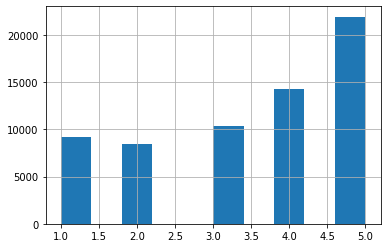

In [0]:
original.Ratings.hist()

In [0]:
rf6 = RandomForestClassifier(bootstrap=True,
                             ccp_alpha=0.0,
                             class_weight=None,
                       criterion='entropy',
                        max_depth=None,
                         max_features='auto',
                       max_leaf_nodes=None,
                        max_samples=None,
                       min_impurity_decrease=0.0,
                        min_impurity_split=None,
                       min_samples_leaf=1,
                        min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                        n_estimators=100,
                       n_jobs=None,
                      oob_score=True,
                       random_state=None,
                       verbose=0,
                      warm_start=False)

In [0]:
rf6.fit(X_train, y_train)
rf6.oob_score_

0.997381110741603

In [0]:
sub4 = sample_sub.copy()

In [0]:
sub4['Ratings'] = rf6.predict(test_order)

In [0]:
sub4.to_csv('sub4.csv', index=False)

In [0]:
print(sub1.Ratings.sum())
print(sub4.Ratings.sum())

55748.0
55753.0


In [0]:
#------# new way of thinking !!!

In [0]:
df = original.copy()

In [0]:
df.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
0,ae9a2bf4d42c67aed92df769580c0f3f30c9b823,4e8c86cfdb5034d208be316e876e885e0effa536,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,c67a6eda67d18898729657a6c53fb21f01961fea,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b,8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,23ce012715a4cf5bfed7f0821e461f1593f47027,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
df.isnull().sum()

user_uuid                0
restaurant_uuid          0
discounted               0
area                     0
cuisine                  0
restaurant_features    275
Ratings                  0
dtype: int64

In [0]:
df = df[df.restaurant_features.notnull()]

In [0]:
df.isnull().sum()

user_uuid              0
restaurant_uuid        0
discounted             0
area                   0
cuisine                0
restaurant_features    0
Ratings                0
dtype: int64

In [0]:
df.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
0,ae9a2bf4d42c67aed92df769580c0f3f30c9b823,4e8c86cfdb5034d208be316e876e885e0effa536,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,c67a6eda67d18898729657a6c53fb21f01961fea,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b,8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,23ce012715a4cf5bfed7f0821e461f1593f47027,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
df.drop(['user_uuid','restaurant_uuid'], axis = 1 , inplace=True)

In [0]:
df.head()

,discounted,area,cuisine,restaurant_features,Ratings
0,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
import re

In [0]:
df['c_cleaned'] = df['cuisine'].map(lambda x: re.sub(r"[^a-zA-Z0-9]+", ' ', x))

In [0]:
df['r_cleaned'] = df['restaurant_features'].map(lambda x: re.sub(r"[^a-zA-Z0-9]+", ' ', x))

In [0]:
df.drop(['cuisine', 'restaurant_features'], axis= 1, inplace=True)

In [0]:
df.head()

,discounted,area,Ratings,c_cleaned,r_cleaned
0,1,Sheikh Zayed,1.0,Egyptian Oriental Fast Food,No Smoking Area Outdoor WiFi Khorogat Iftar
1,0,New Cairo,5.0,Egyptian Koshary,Outdoor TV Drive ins Cheap Eats
2,0,Sheikh Zayed,1.0,Egyptian Grill,No Smoking Area Casual Dining
3,0,Nasr City,3.0,Pizza Egyptian,Outdoor 24 hrs
4,0,Mohandessin,5.0,Egyptian Fast Food,No Smoking Area


In [0]:
df['c_cleaned'] = df['c_cleaned'].map(lambda x: x.replace('dtype object', ''))

In [0]:
df['r_cleaned'] = df['r_cleaned'].map(lambda x: x.replace('dtype object', ''))

In [0]:
df['c_cleaned'] = df['c_cleaned'].map(lambda x: x.replace('array', ''))

In [0]:
df['r_cleaned'] = df['r_cleaned'].map(lambda x: x.replace('array', ''))

In [0]:
df.r_cleaned.nunique()

225

In [0]:
df.c_cleaned.nunique()

181

In [0]:
df.head()

,discounted,area,Ratings,c_cleaned,r_cleaned
0,1,Sheikh Zayed,1.0,Egyptian Oriental Fast Food,No Smoking Area Outdoor WiFi Khorogat Iftar
1,0,New Cairo,5.0,Egyptian Koshary,Outdoor TV Drive ins Cheap Eats
2,0,Sheikh Zayed,1.0,Egyptian Grill,No Smoking Area Casual Dining
3,0,Nasr City,3.0,Pizza Egyptian,Outdoor 24 hrs
4,0,Mohandessin,5.0,Egyptian Fast Food,No Smoking Area


In [0]:
df['c_cleaned'] = df['c_cleaned'].map(lambda x: x.strip())
df['r_cleaned'] = df['r_cleaned'].map(lambda x: x.strip())

In [0]:
df.head()

,discounted,area,Ratings,c_cleaned,r_cleaned
0,1,Sheikh Zayed,1.0,Egyptian Oriental Fast Food,No Smoking Area Outdoor WiFi Khorogat Iftar
1,0,New Cairo,5.0,Egyptian Koshary,Outdoor TV Drive ins Cheap Eats
2,0,Sheikh Zayed,1.0,Egyptian Grill,No Smoking Area Casual Dining
3,0,Nasr City,3.0,Pizza Egyptian,Outdoor 24 hrs
4,0,Mohandessin,5.0,Egyptian Fast Food,No Smoking Area


In [0]:
df.r_cleaned.nunique()

225

In [0]:
t = df['c_cleaned'].str.lower().str.split()

In [0]:
results = set()
t.apply(results.update)

0        None
1        None
2        None
3        None
4        None
         ... 
64145    None
64146    None
64147    None
64148    None
64149    None
Name: c_cleaned, Length: 63875, dtype: object

In [0]:
print (results)

{'we', 'italian', 'argentinian', 'desserts', 'steaks', 'vegetarian', 'asian', 'tarts', 'syrian', 'pastries', 'thai', 'grill', 'burgers', 'bakeries', 'ta3meya', 'food', 'sushi', 'fast', 'german', 'foul', 'sandwiches', 'mexican', 'oriental', 'indian', 'chocolates', 'chinese', 'mex', 'koshary', 'pizza', 'international', 'lebanese', 'coffee', 'american', 'tex', 'seafood', 'egyptian', 'chicken', 'japanese', 'drinks', 'turkish', 'spanish', 'and', 'french', 'european'}


In [0]:
res_list = list(results)

In [0]:
df_cleaned = df.copy()

In [0]:
for word in res_list:
  df_cleaned[word] = [0]*len(df_cleaned)

In [0]:
for word in res_list:
  df_cleaned.loc[(df.c_cleaned.str.lower().str.contains(word)), word] = 1

In [0]:
df_cleaned.head()

,discounted,area,Ratings,c_cleaned,r_cleaned,we,italian,argentinian,desserts,steaks,vegetarian,asian,tarts,syrian,pastries,thai,grill,burgers,bakeries,ta3meya,food,sushi,fast,german,foul,sandwiches,mexican,oriental,indian,chocolates,chinese,mex,koshary,pizza,international,lebanese,coffee,american,tex,seafood,egyptian,chicken,japanese,drinks,turkish,spanish,and,french,european
0,1,Sheikh Zayed,1.0,Egyptian Oriental Fast Food,No Smoking Area Outdoor WiFi Khorogat Iftar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,New Cairo,5.0,Egyptian Koshary,Outdoor TV Drive ins Cheap Eats,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,Sheikh Zayed,1.0,Egyptian Grill,No Smoking Area Casual Dining,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,Nasr City,3.0,Pizza Egyptian,Outdoor 24 hrs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,Mohandessin,5.0,Egyptian Fast Food,No Smoking Area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
t2 = df['r_cleaned'].str.lower().str.split()
results2 = set()
t2.apply(results2.update)

0        None
1        None
2        None
3        None
4        None
         ... 
64145    None
64146    None
64147    None
64148    None
64149    None
Name: r_cleaned, Length: 63875, dtype: object

In [0]:
print(results2)

{'fel', 'ins', 'live', 'romantic', 'tents', 'coffeeshops', 'outdoor', 'area', 'eats', 'pet', 'view', 'friendly', 'post', 'work', 'khorouga', 'hidden', 'or', 'ramadan', 'with', 'alcohol', 'shisha', 'pride', 'drive', 'catering', 'grill', 'buffet', 'kids', 'in', 'day', 'food', 'fetar', '24', 'dining', 'open', 'fancy', 'w', 'nile', 'iftar', 'casual', 'sahel', 'street', 'khorogat', 'sohour', 'smoking', 'breakfast', 'sea', 'hangouts', 'alex', 'hrs', 'during', 'a', 'wifi', 'of', 'seafood', 'playground', 'coffee', 'music', 'hussein', 'study', 'cheap', 'places', 'tv', 'gems', 'sokhna', 'no'}


In [0]:
res_list2 = list(results2)

In [0]:
for word in res_list2:
  df_cleaned[word] = [0]*len(df_cleaned)

In [0]:
for word in res_list2:
  df_cleaned.loc[(df.r_cleaned.str.lower().str.contains(word)), word] = 1

In [0]:
df_cleaned.head()

,discounted,area,Ratings,c_cleaned,r_cleaned,we,italian,argentinian,desserts,steaks,vegetarian,asian,tarts,syrian,pastries,thai,grill,burgers,bakeries,ta3meya,food,sushi,fast,german,foul,sandwiches,mexican,oriental,indian,chocolates,chinese,mex,koshary,pizza,international,lebanese,coffee,american,tex,seafood,egyptian,chicken,japanese,drinks,turkish,spanish,and,french,european,fel,ins,live,romantic,tents,coffeeshops,outdoor,eats,pet,view,friendly,post,work,khorouga,hidden,or,ramadan,with,alcohol,shisha,pride,drive,catering,buffet,kids,in,day,fetar,24,dining,open,fancy,w,nile,iftar,casual,sahel,street,khorogat,sohour,smoking,breakfast,sea,hangouts,alex,hrs,during,a,wifi,of,playground,music,hussein,study,cheap,places,tv,gems,sokhna,no
0,1,1,1.0,Egyptian Oriental Fast Food,No Smoking Area Outdoor WiFi Khorogat Iftar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,5.0,Egyptian Koshary,Outdoor TV Drive ins Cheap Eats,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,0,1,1.0,Egyptian Grill,No Smoking Area Casual Dining,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,3.0,Pizza Egyptian,Outdoor 24 hrs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,5.0,Egyptian Fast Food,No Smoking Area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
df_cleaned.shape

(63875, 109)

In [0]:
to_drop = ['we', 'mex', 'and', 'fel', 'ins', 'in', '24', 'w', 'day', 'during', 'a', 'of', 'or','with', 'no', 'hrs', 'during']

In [0]:
df_cleaned.drop(to_drop, axis = 1 , inplace = True)

In [0]:
df_cleaned.drop(['c_cleaned','r_cleaned'], axis=1 , inplace = True )

In [0]:
df_cleaned.shape

(63875, 91)

In [0]:
df_cleaned.head()

,discounted,area,Ratings,italian,argentinian,desserts,steaks,vegetarian,asian,tarts,syrian,pastries,thai,grill,burgers,bakeries,ta3meya,food,sushi,fast,german,foul,sandwiches,mexican,oriental,indian,chocolates,chinese,koshary,pizza,international,lebanese,coffee,american,tex,seafood,egyptian,chicken,japanese,drinks,turkish,spanish,french,european,live,romantic,tents,coffeeshops,outdoor,eats,pet,view,friendly,post,work,khorouga,hidden,ramadan,alcohol,shisha,pride,drive,catering,buffet,kids,fetar,dining,open,fancy,nile,iftar,casual,sahel,street,khorogat,sohour,smoking,breakfast,sea,hangouts,alex,wifi,playground,music,hussein,study,cheap,places,tv,gems,sokhna
0,1,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
area_dummies = pd.get_dummies(df.area)

In [0]:
df_cleaned.drop('area', axis = 1 , inplace = True)

In [0]:
df_final = pd.concat([df_cleaned, area_dummies], axis = 1)

In [0]:
df_final.head()

,discounted,Ratings,italian,argentinian,desserts,steaks,vegetarian,asian,tarts,syrian,pastries,thai,grill,burgers,bakeries,ta3meya,food,sushi,fast,german,foul,sandwiches,mexican,oriental,indian,chocolates,chinese,koshary,pizza,international,lebanese,coffee,american,tex,seafood,egyptian,chicken,japanese,drinks,turkish,spanish,french,european,live,romantic,tents,coffeeshops,outdoor,eats,pet,view,friendly,post,work,khorouga,hidden,ramadan,alcohol,shisha,pride,drive,catering,buffet,kids,fetar,dining,open,fancy,nile,iftar,casual,sahel,street,khorogat,sohour,smoking,breakfast,sea,hangouts,alex,wifi,playground,music,hussein,study,cheap,places,tv,gems,sokhna,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Moharam Bek,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Sidi Gaber,Smart Village,Sporting,Stanley,Zamalek
0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_final.shape

(63875, 134)

In [0]:
#Splitting our df_class to X and y
X = df_final.drop('Ratings', axis= 1)
y = df_final['Ratings']
print(X.shape)
print(y.shape)

(63875, 133)
(63875,)


In [0]:
#creating an array of models
models = []
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
#models.append(("SVC",SVC()))
#models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

In [0]:
for name,model in models:
    kfold = KFold(n_splits=2, random_state=10)
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "f1_weighted")
    print(name, (cv_result[0] + cv_result[1]) / 2 )

RF 0.9969299655743957
XGB 0.7704421056516499


In [0]:
test.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Id
0,19e98f91a13b634be56eed320a5cfa428739645a,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,0
1,f0290330fa79c2ee444f111acfafb182f155db13,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Dokki,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,1
2,6aa82c8a1f318d6c1854d9a740f9505ca17fa9b6,3de74737b13a7d38064af610999f8e072d28dc0a,0,Downtown,['Egyptian' 'Koshary'],['No Smoking Area' 'Outdoor' 'Hidden Gems' 'Ch...,2
3,c0d74c01ffc2725e7eaf2eae20b7e4841ddfc1d5,0f80dcedefb437153c78531e139d5305bc513e2d,0,Maadi,['Pizza' 'American'],['No Smoking Area'],3
4,2aedfea343537c087cdfb5c70d6a432b689c1d2a,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,1,Nasr City,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4


In [0]:
test_cleaned = test.copy()

In [0]:
test_cleaned.drop(['user_uuid', 'restaurant_uuid'], axis = 1, inplace=True)

In [0]:
test_cleaned.head()

,discounted,area,cuisine,restaurant_features,Id
0,0,Heliopolis,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,0
1,0,Dokki,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,1
2,0,Downtown,['Egyptian' 'Koshary'],['No Smoking Area' 'Outdoor' 'Hidden Gems' 'Ch...,2
3,0,Maadi,['Pizza' 'American'],['No Smoking Area'],3
4,1,Nasr City,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4


In [0]:
test_cleaned['c_cleaned'] = test_cleaned['cuisine'].map(lambda x: re.sub(r"[^a-zA-Z0-9]+", ' ', x)) #remove special char
test_cleaned['r_cleaned'] = test_cleaned['restaurant_features'].map(lambda x: re.sub(r"[^a-zA-Z0-9]+", ' ', x))
test_cleaned.drop(['cuisine', 'restaurant_features'], axis= 1, inplace=True)
test_cleaned['c_cleaned'] = test_cleaned['c_cleaned'].map(lambda x: x.replace('dtype object', ''))
test_cleaned['r_cleaned'] = test_cleaned['r_cleaned'].map(lambda x: x.replace('dtype object', ''))
test_cleaned['c_cleaned'] = test_cleaned['c_cleaned'].map(lambda x: x.replace('array', ''))
test_cleaned['r_cleaned'] = test_cleaned['r_cleaned'].map(lambda x: x.replace('array', ''))
test_cleaned['c_cleaned'] = test_cleaned['c_cleaned'].map(lambda x: x.strip())
test_cleaned['r_cleaned'] = test_cleaned['r_cleaned'].map(lambda x: x.strip())

In [0]:
test_cleaned.head()

,discounted,area,Id,c_cleaned,r_cleaned
0,0,Heliopolis,0,Egyptian Oriental Grill,No Smoking Area Outdoor TV WiFi Grill Catering
1,0,Dokki,1,Burgers Sandwiches Fast Food,No Smoking Area Outdoor WiFi Kids Friendly Pla...
2,0,Downtown,2,Egyptian Koshary,No Smoking Area Outdoor Hidden Gems Cheap Eats
3,0,Maadi,3,Pizza American,No Smoking Area
4,1,Nasr City,4,Burgers Sandwiches Fast Food,No Smoking Area Outdoor WiFi Kids Friendly Pla...


In [0]:
t_test = test_cleaned['c_cleaned'].str.lower().str.split()
results_test = set()
t_test.apply(results_test.update)
res_list_test = list(results_test)

In [0]:
res_list_test

['we',
 'italian',
 'argentinian',
 'desserts',
 'steaks',
 'vegetarian',
 'asian',
 'tarts',
 'syrian',
 'pastries',
 'thai',
 'grill',
 'burgers',
 'bakeries',
 'ta3meya',
 'food',
 'sushi',
 'fast',
 'german',
 'foul',
 'sandwiches',
 'mexican',
 'oriental',
 'indian',
 'chocolates',
 'chinese',
 'mex',
 'koshary',
 'pizza',
 'tex',
 'international',
 'american',
 'coffee',
 'lebanese',
 'seafood',
 'egyptian',
 'chicken',
 'japanese',
 'drinks',
 'turkish',
 'spanish',
 'and',
 'european',
 'french']

In [0]:
for word in res_list_test:
  test_cleaned[word] = [0]*len(test_cleaned)

In [0]:
test_cleaned.head()

,discounted,area,Id,c_cleaned,r_cleaned,we,italian,argentinian,desserts,steaks,vegetarian,asian,tarts,syrian,pastries,thai,grill,burgers,bakeries,ta3meya,food,sushi,fast,german,foul,sandwiches,mexican,oriental,indian,chocolates,chinese,mex,koshary,pizza,tex,international,american,coffee,lebanese,seafood,egyptian,chicken,japanese,drinks,turkish,spanish,and,european,french
0,0,Heliopolis,0,Egyptian Oriental Grill,No Smoking Area Outdoor TV WiFi Grill Catering,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Dokki,1,Burgers Sandwiches Fast Food,No Smoking Area Outdoor WiFi Kids Friendly Pla...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Downtown,2,Egyptian Koshary,No Smoking Area Outdoor Hidden Gems Cheap Eats,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Maadi,3,Pizza American,No Smoking Area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,Nasr City,4,Burgers Sandwiches Fast Food,No Smoking Area Outdoor WiFi Kids Friendly Pla...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
for word in res_list_test:
  test_cleaned.loc[(test_cleaned.c_cleaned.str.lower().str.contains(word)), word] = 1

In [0]:
test_cleaned.head()

,discounted,area,Id,c_cleaned,r_cleaned,we,italian,argentinian,desserts,steaks,vegetarian,asian,tarts,syrian,pastries,thai,grill,burgers,bakeries,ta3meya,food,sushi,fast,german,foul,sandwiches,mexican,oriental,indian,chocolates,chinese,mex,koshary,pizza,tex,international,american,coffee,lebanese,seafood,egyptian,chicken,japanese,drinks,turkish,spanish,and,european,french
0,0,Heliopolis,0,Egyptian Oriental Grill,No Smoking Area Outdoor TV WiFi Grill Catering,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,Dokki,1,Burgers Sandwiches Fast Food,No Smoking Area Outdoor WiFi Kids Friendly Pla...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,Downtown,2,Egyptian Koshary,No Smoking Area Outdoor Hidden Gems Cheap Eats,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,Maadi,3,Pizza American,No Smoking Area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,Nasr City,4,Burgers Sandwiches Fast Food,No Smoking Area Outdoor WiFi Kids Friendly Pla...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
t2_test = test_cleaned['r_cleaned'].str.lower().str.split()
results2_test = set()
t2_test.apply(results2_test.update)
res_list2_test = list(results2_test)

In [0]:
res_list2_test

['fel',
 'ins',
 'live',
 'romantic',
 'tents',
 'coffeeshops',
 'outdoor',
 'area',
 'eats',
 'pet',
 'view',
 'friendly',
 'post',
 'work',
 'khorouga',
 'hidden',
 'or',
 'ramadan',
 'with',
 'alcohol',
 'shisha',
 'catering',
 'drive',
 'grill',
 'buffet',
 'kids',
 'day',
 'in',
 'food',
 'fetar',
 '24',
 'dining',
 'open',
 'fancy',
 'w',
 'nile',
 'iftar',
 'casual',
 'sahel',
 'street',
 'khorogat',
 'sohour',
 'smoking',
 'sea',
 'breakfast',
 'hangouts',
 'hrs',
 'during',
 'a',
 'wifi',
 'seafood',
 'playground',
 'coffee',
 'music',
 'hussein',
 'study',
 'cheap',
 'places',
 'tv',
 'gems',
 'sokhna',
 'no']

In [0]:
for word in res_list2_test:
  test_cleaned[word] = [0]*len(test_cleaned)

In [0]:
test_cleaned.head()

,discounted,area,Id,c_cleaned,r_cleaned,we,italian,argentinian,desserts,steaks,vegetarian,asian,tarts,syrian,pastries,thai,grill,burgers,bakeries,ta3meya,food,sushi,fast,german,foul,sandwiches,mexican,oriental,indian,chocolates,chinese,mex,koshary,pizza,tex,international,american,coffee,lebanese,seafood,egyptian,chicken,japanese,drinks,turkish,spanish,and,european,french,fel,ins,live,romantic,tents,coffeeshops,outdoor,eats,pet,view,friendly,post,work,khorouga,hidden,or,ramadan,with,alcohol,shisha,catering,drive,buffet,kids,day,in,fetar,24,dining,open,fancy,w,nile,iftar,casual,sahel,street,khorogat,sohour,smoking,sea,breakfast,hangouts,hrs,during,a,wifi,playground,music,hussein,study,cheap,places,tv,gems,sokhna,no
0,0,0,0,Egyptian Oriental Grill,No Smoking Area Outdoor TV WiFi Grill Catering,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,Burgers Sandwiches Fast Food,No Smoking Area Outdoor WiFi Kids Friendly Pla...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2,Egyptian Koshary,No Smoking Area Outdoor Hidden Gems Cheap Eats,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,3,Pizza American,No Smoking Area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,4,Burgers Sandwiches Fast Food,No Smoking Area Outdoor WiFi Kids Friendly Pla...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
for word in res_list2_test:
  test_cleaned.loc[(test_cleaned.r_cleaned.str.lower().str.contains(word)), word] = 1

In [0]:
to_drop_test = ['we', 'mex', 'and', 'fel', 'ins', 'in', '24', 'w', 'day', 'during', 'a', 'or','with', 'no', 'hrs', 'during']
test_cleaned.drop(to_drop_test, axis = 1 , inplace = True)

In [0]:
test_cleaned.drop(['c_cleaned','r_cleaned'], axis=1 , inplace = True )

In [0]:
area_dummies_test = pd.get_dummies(test.area)

In [0]:
test_cleaned.drop('area', axis = 1 , inplace = True)

In [0]:
test_final = pd.concat([test_cleaned, area_dummies_test], axis = 1)

In [0]:
test_final.head()

,discounted,Id,italian,argentinian,desserts,steaks,vegetarian,asian,tarts,syrian,pastries,thai,grill,burgers,bakeries,ta3meya,food,sushi,fast,german,foul,sandwiches,mexican,oriental,indian,chocolates,chinese,koshary,pizza,tex,international,american,coffee,lebanese,seafood,egyptian,chicken,japanese,drinks,turkish,spanish,european,french,live,romantic,tents,coffeeshops,outdoor,eats,pet,view,friendly,post,work,khorouga,hidden,ramadan,alcohol,shisha,catering,drive,buffet,kids,fetar,dining,open,fancy,nile,iftar,casual,sahel,street,khorogat,sohour,smoking,sea,breakfast,hangouts,wifi,playground,music,hussein,study,cheap,places,tv,gems,sokhna,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Smart Village,Sporting,Stanley,Zamalek
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
test_final.shape

(15879, 130)

In [0]:
X.shape

(63875, 133)

In [0]:
different = []
for col in X.columns:
  if col not in test_final.columns :
    different.append(col)
len(different)

4

In [0]:
different

['pride', 'alex', 'Moharam Bek', 'Sidi Gaber']

In [0]:
X.drop(different,axis=1,inplace=True)

In [0]:
X.shape

(63875, 129)

In [0]:
test_final.drop('Id',axis=1 , inplace=True)

In [0]:
print(X.shape)
print(test_final.shape)

(63875, 129)
(15879, 129)


In [0]:
X = X.sort_index(axis=1)
test_final = test_final.sort_index(axis=1)

In [0]:
X.head(1)

,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Smart Village,Sporting,Stanley,Zamalek,alcohol,american,argentinian,asian,bakeries,breakfast,buffet,burgers,casual,catering,cheap,chicken,chinese,chocolates,coffee,coffeeshops,desserts,dining,discounted,drinks,drive,eats,egyptian,european,fancy,fast,fetar,food,foul,french,friendly,gems,german,grill,hangouts,hidden,hussein,iftar,indian,international,italian,japanese,khorogat,khorouga,kids,koshary,lebanese,live,mexican,music,nile,open,oriental,outdoor,pastries,pet,pizza,places,playground,post,ramadan,romantic,sahel,sandwiches,sea,seafood,shisha,smoking,sohour,sokhna,spanish,steaks,street,study,sushi,syrian,ta3meya,tarts,tents,tex,thai,turkish,tv,vegetarian,view,wifi,work
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
test_final.head(1)

,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Smart Village,Sporting,Stanley,Zamalek,alcohol,american,argentinian,asian,bakeries,breakfast,buffet,burgers,casual,catering,cheap,chicken,chinese,chocolates,coffee,coffeeshops,desserts,dining,discounted,drinks,drive,eats,egyptian,european,fancy,fast,fetar,food,foul,french,friendly,gems,german,grill,hangouts,hidden,hussein,iftar,indian,international,italian,japanese,khorogat,khorouga,kids,koshary,lebanese,live,mexican,music,nile,open,oriental,outdoor,pastries,pet,pizza,places,playground,post,ramadan,romantic,sahel,sandwiches,sea,seafood,shisha,smoking,sohour,sokhna,spanish,steaks,street,study,sushi,syrian,ta3meya,tarts,tents,tex,thai,turkish,tv,vegetarian,view,wifi,work
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [0]:
set(X.columns) == set(test_final.columns)

True

In [0]:
rf_cleaned = RandomForestClassifier(oob_score=True)
xgb_cleaned = xgb.XGBClassifier()

In [0]:
rf_cleaned.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_cleaned.oob_score_

0.9975107632093934

In [0]:
pred_cleaned = rf_cleaned.predict(test_final)

In [0]:
sub_5 = sample_sub.copy()

In [0]:
sub_5.Ratings = pred_cleaned

In [0]:
sub_5.to_csv('sub5.csv', index = False)

In [0]:
#------#
rf_c2 = RandomForestClassifier(n_estimators= 1000 , oob_score= True)

In [0]:
rf_c2.fit(X,y)
preds = rf_c2.predict(test_final)

In [0]:
sub_6 = sample_sub.copy()

In [0]:
sub_6.Ratings = preds

In [0]:
sub_6.to_csv('sub6.csv', index = False)

In [0]:
rf_c2.oob_score_

0.9975420743639922

In [0]:
xgb_cleaned.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_pred = xgb_cleaned.predict(test_final)

In [0]:
xgb_pred[0:10]

array([5., 4., 3., 4., 5., 5., 3., 1., 4., 3.])

In [0]:
sub7=sample_sub.copy()

In [0]:
sub7.Ratings = xgb_pred

In [0]:
sub7.to_csv('sub7.csv', index = False)

In [0]:
#---# grid search ! 

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
rf_grid = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

In [0]:
rf_random = RandomizedSearchCV(estimator = rf1,scoring='f1_weighted', param_distributions = random_grid, n_iter = 8, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [0]:
X_train.head()

,discounted,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,Camp Cesar,Cleopatra,Dokki,Downtown,El Sayeda Zeinab,Faisal,Garden City,Giza,Hadayek El Ahram,Hadayek El Kobba,Haram,Heliopolis,Imbaba,Kafr Abdo,Louran,Maadi,Madinaty,Manial,Masaken Sheraton,Misr El Kadima,Mohandessin,Moharam Bek,Nasr City,New Cairo,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Sidi Gaber,Smart Village,Sporting,Stanley,Zamalek,['American' 'Steaks'],['Asian' 'Chinese' 'Fast Food'],['Asian' 'Chinese' 'Thai'],['Asian' 'Chinese' 'Vegetarian'],['Asian' 'Chinese'],['Asian' 'Indian'],['Asian' 'Japanese' 'Sushi' 'Steaks'],['Asian' 'Japanese' 'Sushi'],['Asian' 'Japanese' 'Tarts and chocolates' 'Argentinian'],['Asian' 'Sushi' 'Thai'],['Asian' 'Tarts and chocolates'],['Asian'],['Bakeries and Pastries' 'American' 'Desserts'],['Bakeries and Pastries' 'Coffee & Drinks'],['Bakeries and Pastries' 'Desserts' 'Coffee & Drinks'],['Bakeries and Pastries' 'Desserts'],['Bakeries and Pastries' 'Fast Food' 'Desserts'],['Bakeries and Pastries'],['Burgers' 'American' 'Tex-Mex'],['Burgers' 'American'],['Burgers' 'Desserts' 'Coffee & Drinks'],['Burgers' 'Fast Food' 'American'],['Burgers' 'Fast Food'],['Burgers' 'Pizza' 'American' 'Steaks'],['Burgers' 'Sandwiches' 'Bakeries and Pastries'],['Burgers' 'Sandwiches' 'Chicken'],['Burgers' 'Sandwiches' 'Fast Food' 'American'],['Burgers' 'Sandwiches' 'Fast Food'],['Burgers' 'Sandwiches'],['Burgers' 'Steaks'],['Burgers'],['Chicken'],['Coffee & Drinks'],['Desserts'],['Egyptian' 'Fast Food' 'Foul we Ta3meya'],['Egyptian' 'Fast Food'],['Egyptian' 'Grill' 'Chicken'],['Egyptian' 'Grill'],['Egyptian' 'Koshary'],['Egyptian' 'Oriental' 'Fast Food' 'Foul we Ta3meya'],['Egyptian' 'Oriental' 'Fast Food'],['Egyptian' 'Oriental' 'Foul we Ta3meya'],['Egyptian' 'Oriental' 'Grill'],['Egyptian' 'Oriental' 'Lebanese'],['Egyptian' 'Oriental' 'Sandwiches' 'Grill'],['Egyptian' 'Oriental' 'Sandwiches'],['Egyptian' 'Oriental'],['Egyptian' 'Sandwiches' 'Fast Food' 'Foul we Ta3meya'],['Egyptian' 'Sandwiches' 'Fast Food' 'Grill'],['Egyptian' 'Sandwiches' 'Fast Food'],['Egyptian' 'Sandwiches' 'Foul we Ta3meya'],['Egyptian' 'Sandwiches' 'Koshary' 'Foul we Ta3meya'],['Egyptian' 'Sandwiches' 'Lebanese' 'American'],['Egyptian' 'Sandwiches'],['Egyptian'],['European'],['Fast Food' 'Chicken'],['Fast Food' 'Desserts'],['Fast Food' 'Foul we Ta3meya' 'Syrian'],['Fast Food' 'Grill' 'Chicken'],['Fast Food' 'Grill'],['Fast Food' 'Lebanese'],['Fast Food'],['Foul we Ta3meya'],['French'],['German' 'Chicken'],['Grill' 'Chicken' 'Syrian'],['Grill' 'German'],['Grill' 'Syrian'],['Grill'],['Indian'],['International' 'Bakeries and Pastries' 'Coffee & Drinks'],['International' 'Bakeries and Pastries' 'Desserts'],['International' 'Coffee & Drinks'],['International' 'Desserts' 'Coffee & Drinks'],['International' 'Desserts'],['International' 'Fast Food'],['International' 'Grill' 'Coffee & Drinks'],['International' 'Oriental' 'Sandwiches' 'Fast Food'],['International' 'Sandwiches' 'Grill' 'Chicken'],['International' 'Sandwiches'],['International' 'Steaks'],['International' 'Tex-Mex' 'Steaks'],['International'],['Italian' 'Coffee & Drinks'],['Italian' 'Egyptian' 'Oriental' 'Fast Food'],['Italian' 'International' 'American'],['Italian' 'Pizza' 'Bakeries and Pastries'],['Italian' 'Pizza' 'Coffee & Drinks'],['Italian' 'Pizza' 'Egyptian' 'Desserts'],['Italian' 'Pizza' 'Fast Food'],['Italian' 'Pizza' 'Oriental'],['Italian' 'Pizza' 'Sandwiches' 'Fast Food'],['Italian' 'Pizza' 'Spanish'],['Italian' 'Pizza'],['Italian' 'Sushi' 'Bakeries and Pastries'],['Italian' 'Sushi' 'Desserts' 'Coffee & Drinks'],['Italian'],['Japanese' 'Sushi' 'Chinese' 'Seafood'],['Japanese' 'Sushi'],['Japanese'],['Koshary'],['Lebanese'],['Oriental' 'Chicken' 'Syrian'],['Oriental' 'Desserts'],['Oriental' 'Foul we Ta3meya'],['Oriental' 'Grill' 'Chicken'],['Oriental' 'Grill' 'Turkish'],['Oriental' 'Grill'],['Oriental' 'Koshary'],['Oriental' 'Lebane

In [0]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 34.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
rf1 = RandomForestClassifier( )

In [0]:
rf1.fit(X_train, y_train)

In [0]:
final_sub = sample_sub.copy()

In [0]:
final_sub.Ratings = rf1.predict()

In [0]:
final = pd.read_csv('sub1_again.csv')

In [0]:
final.iloc[15533,1] = 3

In [0]:
final.to_csv('final.csv', index = False)

In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [0]:
rf_random.best_score_

0.9972436668115389

In [0]:
rf_grid = RandomForestClassifier(bootstrap= False,
 max_depth= 80,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 10,
 n_estimators= 1000)

In [0]:
rf_grid.fit(X,y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
sub8 = sample_sub.copy()

In [0]:
sub8.Ratings = rf_grid.predict(test_final)

In [0]:
sub8.to_csv('sub8.csv', index=False)

In [0]:
p = pd.concat([sub1,sub8], axis = 1)

In [0]:
p.head()

,Id,Ratings,Id,Ratings
0,0,5.0,0,5.0
1,1,4.0,1,4.0
2,2,3.0,2,3.0
3,3,4.0,3,4.0
4,4,5.0,4,5.0


In [0]:
p.columns = ['Id_sub1', 'Ratings_sub1', 'Id_sub8', 'Ratings_sub8'  ]

In [0]:
p.head()

,Id_sub1,Ratings_sub1,Id_sub8,Ratings_sub8
0,0,5.0,0,5.0
1,1,4.0,1,4.0
2,2,3.0,2,3.0
3,3,4.0,3,4.0
4,4,5.0,4,5.0


In [0]:
p[p.Ratings_sub1 != p.Ratings_sub8].shape

(28, 4)

In [0]:
p[p.Ratings_sub1 != p.Ratings_sub8]

,Id_sub1,Ratings_sub1,Id_sub8,Ratings_sub8
246,246,1.0,246,2.0
304,304,1.0,304,2.0
1072,1072,1.0,1072,2.0
1665,1665,2.0,1665,3.0
1947,1947,1.0,1947,2.0
2203,2203,1.0,2203,2.0
2648,2648,2.0,2648,3.0
2814,2814,1.0,2814,2.0
3523,3523,2.0,3523,3.0
3621,3621,2.0,3621,3.0


In [0]:
sub1_modified = sub1.copy()

In [0]:
sub1_modified.iloc[13274,1]

3.0

In [0]:
sub1_modified.iloc[13274,1] = 3

In [0]:
sub1_modified.to_csv('sub1_again.csv',index = False)

In [0]:
sub1_modified

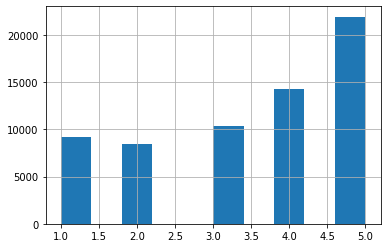

In [0]:
original.Ratings.hist()

In [0]:
sub1_modified.iloc[4947,1] = 1

In [0]:
sub1_modified.to_csv('sub1_again2.csv', index = False)

In [0]:
sub1.iloc[4947,1]

3.0

In [0]:
1665 2648 3523

In [0]:
sub1_modified.iloc[3523,1] = 3

In [0]:
sub1_modified.to_csv('sub1_a3.csv',index = False)